## Script to make a list of a specific family of episodes

### Specific Family of Epsodes like Single Throw Successful, Multiple Throw Successful, etc

In [1]:
#Import libraries
import csv
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
import glob
import seaborn as sns; sns.set()
sns.set(style="dark")

In [2]:
#Create a list of all file names
filenames_list = sorted(glob.glob('../her_throw1_playback/steps/*monitor.csv'))
print('Length of file: ',len(filenames_list)) 
print(filenames_list[500])

Length of file:  28256
../her_throw1_playback/steps/000000000500.monitor.csv


In [3]:
episodes_list=[]
episodes_list=[('Episode ID', 'Remark')]
print(episodes_list)

[('Episode ID', 'Remark')]


In [4]:
#Iterate over all steps in all episodes and collect data of successful episodes
 
rewardVEC=[]
timeSTEPS=[]
isSUCCESS = []
xDISTANCE=[]
isGrabVEC=[]
multipleGrabVEC=[]
highRewardList=[]
successEpisodeList=[]
changeCountList=[]

for file in range(len(filenames_list)):
    
    with open(filenames_list[file]) as csv_file:
        episodeMTX = list(csv.reader(csv_file, delimiter=','))
    del episodeMTX[:2]
    

    #Define traits to be collected
    distBoxGripper=[]
    distBoxGoal=[]
    isGrab = []
    grab_count=0
    reward = 0
    time_steps_grip=0
    movedWoGrab = []
    is_grab=0
    change_count=0
    prev_step_one=0
    step_count=0
    reward_at_last_step=-1


    #Iterate over each episode and collect required data
    for step in episodeMTX:

        step_count+=1

        dist_box_gripper = ((np.double(step[8])-np.double(step[5]))**2 + (np.double(step[9])-np.double(step[6]))**2 + (np.double(step[10])-np.double(step[7]))**2)**0.5
        distBoxGripper.append(dist_box_gripper)

#         if dist_box_gripper<0.05: #CHANGE LIMIT
        if np.double(step[1])==1:
            time_steps_grip+=1
            is_grab=1
            grab_count+=1
        
        
        
        if np.double(step[1]!=prev_step_one):
            change_count+=1
        prev_step_one=step[1]


        dist_box_goal = ((np.double(step[8])-np.double(step[11]))**2 + (np.double(step[9])-np.double(step[12]))**2 + (np.double(step[10])-np.double(step[13]))**2)**0.5
        distBoxGoal.append(dist_box_goal)

#         if (np.double(step[1])==1):
            
        
        
        isGrab.append(np.double(step[1]))

        reward+=np.double(step[3])

        moved_wo_grab = np.double(step[2])
        movedWoGrab.append(moved_wo_grab)

        x_dist=np.double(step[11])
        
        
        if step_count==60:
            reward_at_last_step= np.double(step[3])

    if reward==(-60):
        continue
    else:
        
        if (reward_at_last_step==0):
    
            timeSTEPS.append(time_steps_grip)

            rewardVEC.append(reward)

            xDISTANCE.append(x_dist)

            isGrabVEC.append(is_grab)

            multipleGrabVEC.append(grab_count)

            successEpisodeList.append(episodeMTX)

            changeCountList.append(change_count)

            if reward>(-15): #Condition for defining a 'good' reward (currently set to >-15)
                highRewardList.append(file)
            
print('Done')

#Substract 1 from all elements from x_distance list
xDISTANCE[:] = [x - 1 for x in xDISTANCE]
changeCountList[:] = [x - 1 for x in changeCountList]

print('Done')

Done
Done


In [5]:
#Get episode numbers of all the episodes with multiple grabs
print(len(multipleGrabVEC))
print(len(successEpisodeList))


multiple_grab_episodes =[]
zero_grab_count=0
one_grab_count=0
two_grab_count=0
three_grab_count=0
four_grab_count=0
five_grab_count=0

for i in range(len(multipleGrabVEC)):
    if (changeCountList[i]>=0):
        multiple_grab_episodes.append(i)
        
        if changeCountList[i]==0:
            zero_grab_count+=1
            
        if changeCountList[i]==2:
            one_grab_count+=1
            
        if changeCountList[i]==4:
            two_grab_count+=1
            
        if changeCountList[i]==6:
            three_grab_count+=1
            
        if changeCountList[i]==8:
            four_grab_count+=1
        
        if changeCountList[i]==10:
            five_grab_count+=1
            
        
print(len(multiple_grab_episodes))

print(zero_grab_count, one_grab_count, two_grab_count, three_grab_count, four_grab_count, five_grab_count)

num_attempts = [zero_grab_count, one_grab_count, two_grab_count, three_grab_count, four_grab_count, five_grab_count]
print(len(num_attempts))

#Save all episodes with mutiple grabs in a npy file
# Run this section only while saving

#np.save('../outputs/multipleGrabsVEC.npy', multiple_grab_episodes)

11280
11280
11280
5804 5226 232 13 5 0
6


In [6]:
#Make sure this list matches the above list
multipleGrabList = list(np.load('../outputs/multipleGrabsVEC.npy'))
print(multipleGrabList)
print(len(multipleGrabList))

[39, 93, 146, 167, 183, 208, 270, 426, 436, 483, 501, 515, 538, 550, 636, 641, 703, 760, 789, 798, 826, 835, 857, 859, 881, 887, 900, 955, 1056, 1102, 1301, 1350, 1399, 1418, 1474, 1492, 1563, 1600, 1656, 1722, 1724, 1820, 1898, 1907, 1922, 1928, 1953, 1995, 2147, 2155, 2170, 2362, 2370, 2378, 2387, 2420, 2446, 2468, 2512, 2583, 2593, 2771, 2800, 2945, 2971, 3059, 3260, 3275, 3281, 3340, 3371, 3382, 3387, 3423, 3429, 3480, 3496, 3504, 3538, 3558, 3566, 3657, 3747, 3784, 3785, 3812, 3848, 3864, 3902, 3994, 4052, 4085, 4211, 4259, 4298, 4344, 4431, 4490, 4497, 4524, 4632, 4689, 4695, 4736, 4784, 4847, 4885, 4910, 4928, 5055, 5080, 5109, 5179, 5197, 5429, 5488, 5556, 5681, 5728, 5731, 5857, 5859, 5863, 5896, 5988, 6065, 6136, 6159, 6195, 6207, 6231, 6241, 6335, 6375, 6396, 6575, 6592, 6622, 6643, 6689, 6738, 6746, 6884, 6922, 6960, 6984, 7010, 7072, 7108, 7111, 7118, 7168, 7189, 7200, 7201, 7205, 7220, 7365, 7420, 7498, 7511, 7513, 7542, 7577, 7623, 7624, 7676, 7734, 7759, 7807, 7812, 796

28256
Counter:  60


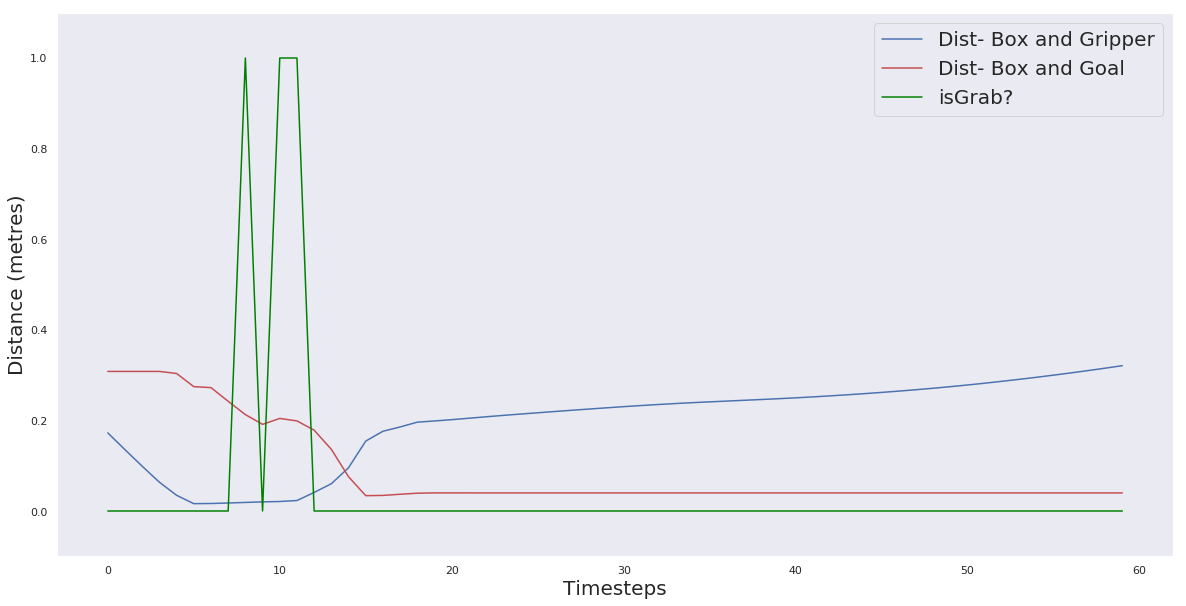

Reward:  -15.0


In [7]:
#Enter the episode number you want to visualize here:

#This script is for verifying 

episode_num = 11195

episodeMTX = successEpisodeList[episode_num]
# del episodeMTX[:2]

print(len(filenames_list))


#Iterate over each episode and collect required data

#Define traits to be collected
distBoxGripper=[]
distBoxGoal=[]
isGrab = []
reward = 0
time_steps_grip=0
movedWoGrab = []
    
counter=0

for step in episodeMTX:
    
    counter+=1

    dist_box_gripper = ((np.double(step[8])-np.double(step[5]))**2 + (np.double(step[9])-np.double(step[6]))**2 + (np.double(step[10])-np.double(step[7]))**2)**0.5
    distBoxGripper.append(dist_box_gripper)

#     if dist_box_gripper<0.05: #CHANGE LIMIT
#         time_steps_grip+=1

    dist_box_goal = ((np.double(step[8])-np.double(step[11]))**2 + (np.double(step[9])-np.double(step[12]))**2 + (np.double(step[10])-np.double(step[13]))**2)**0.5
    distBoxGoal.append(dist_box_goal)

    isGrab.append(np.double(step[1]))

    reward+=np.double(step[3])

    moved_wo_grab = np.double(step[2])
    movedWoGrab.append(moved_wo_grab)
    
print("Counter: ",counter)

#Plot data
plt.figure(figsize=(20,10))
plt.plot(distBoxGripper,'b')
plt.plot(distBoxGoal,'r')
plt.ylim(-0.1,1.1)
plt.xlabel('Timesteps', fontsize=20)
plt.ylabel('Distance (metres)', fontsize=20)
#plt.plot(movedWoGrab,'purple')
plt.plot(isGrab,'green')
plt.legend(('Dist- Box and Gripper', 'Dist- Box and Goal','isGrab?'), prop={'size': 20})
plt.show()   

print('Reward: ',reward)

## Scipt to Plot Persistance

In [8]:
#Load list of episodes with multiple grabs and throw
multipleGrabList = list(np.load('../outputs/multipleGrabsVEC.npy'))
print(multipleGrabList)
print(len(multipleGrabList))

[39, 93, 146, 167, 183, 208, 270, 426, 436, 483, 501, 515, 538, 550, 636, 641, 703, 760, 789, 798, 826, 835, 857, 859, 881, 887, 900, 955, 1056, 1102, 1301, 1350, 1399, 1418, 1474, 1492, 1563, 1600, 1656, 1722, 1724, 1820, 1898, 1907, 1922, 1928, 1953, 1995, 2147, 2155, 2170, 2362, 2370, 2378, 2387, 2420, 2446, 2468, 2512, 2583, 2593, 2771, 2800, 2945, 2971, 3059, 3260, 3275, 3281, 3340, 3371, 3382, 3387, 3423, 3429, 3480, 3496, 3504, 3538, 3558, 3566, 3657, 3747, 3784, 3785, 3812, 3848, 3864, 3902, 3994, 4052, 4085, 4211, 4259, 4298, 4344, 4431, 4490, 4497, 4524, 4632, 4689, 4695, 4736, 4784, 4847, 4885, 4910, 4928, 5055, 5080, 5109, 5179, 5197, 5429, 5488, 5556, 5681, 5728, 5731, 5857, 5859, 5863, 5896, 5988, 6065, 6136, 6159, 6195, 6207, 6231, 6241, 6335, 6375, 6396, 6575, 6592, 6622, 6643, 6689, 6738, 6746, 6884, 6922, 6960, 6984, 7010, 7072, 7108, 7111, 7118, 7168, 7189, 7200, 7201, 7205, 7220, 7365, 7420, 7498, 7511, 7513, 7542, 7577, 7623, 7624, 7676, 7734, 7759, 7807, 7812, 796

In [9]:
#Iterate over all steps in all episodes and collect data of successful episodes

#Re-Generate the successfulEpisodesList, and make sure the numebr of steps is 60
 
ts_success_List=[]
ts_grabs_List=[]

for file in multipleGrabList:

    episodeMTX = successEpisodeList[file]
    
    #Define traits to be collected
    ts_grabs=[]
    successFlag=0
    firstFlag=0
    
    if firstFlag==0:
        step_zero = np.double(episodeMTX[0][0])
    
    #Iterate over each episode and collect required data
    for step in episodeMTX:
        
        if (np.abs(np.double(step[3]))<0.5 and successFlag==0):
            ts_success = ((np.double(step[0])-step_zero))
            successFlag=1

        if (np.double(step[1])!=np.double(prev_step_one)):
            if (np.double(prev_step_one)==0.0):
                ts_grabs.append((np.double(step[0])-step_zero))

        prev_step_one = step[1]

    ts_success_List.append(ts_success)
    ts_grabs_List.append(ts_grabs)
        
            
print('Done')
print("Length of TS_Success List: ", len(ts_success_List))
print("Length of Success_Grabs List: ", len(ts_grabs_List))

Done
Length of TS_Success List:  250
Length of Success_Grabs List:  250


In [10]:
#Script to Convert actual timesteps to number of timesteps from Success

#Don't run this more than once

#Sample
print(ts_success_List[0])
print(ts_grabs_List[0])

for i in range(len(ts_success_List)):
    
    ts_grabs_List[i][:] = [ts_success_List[i]-x for x in ts_grabs_List[i]]

#Sample
print(ts_success_List[0])
print(ts_grabs_List[0])

52.0
[14.0, 29.0, 36.0]
52.0
[38.0, 23.0, 16.0]


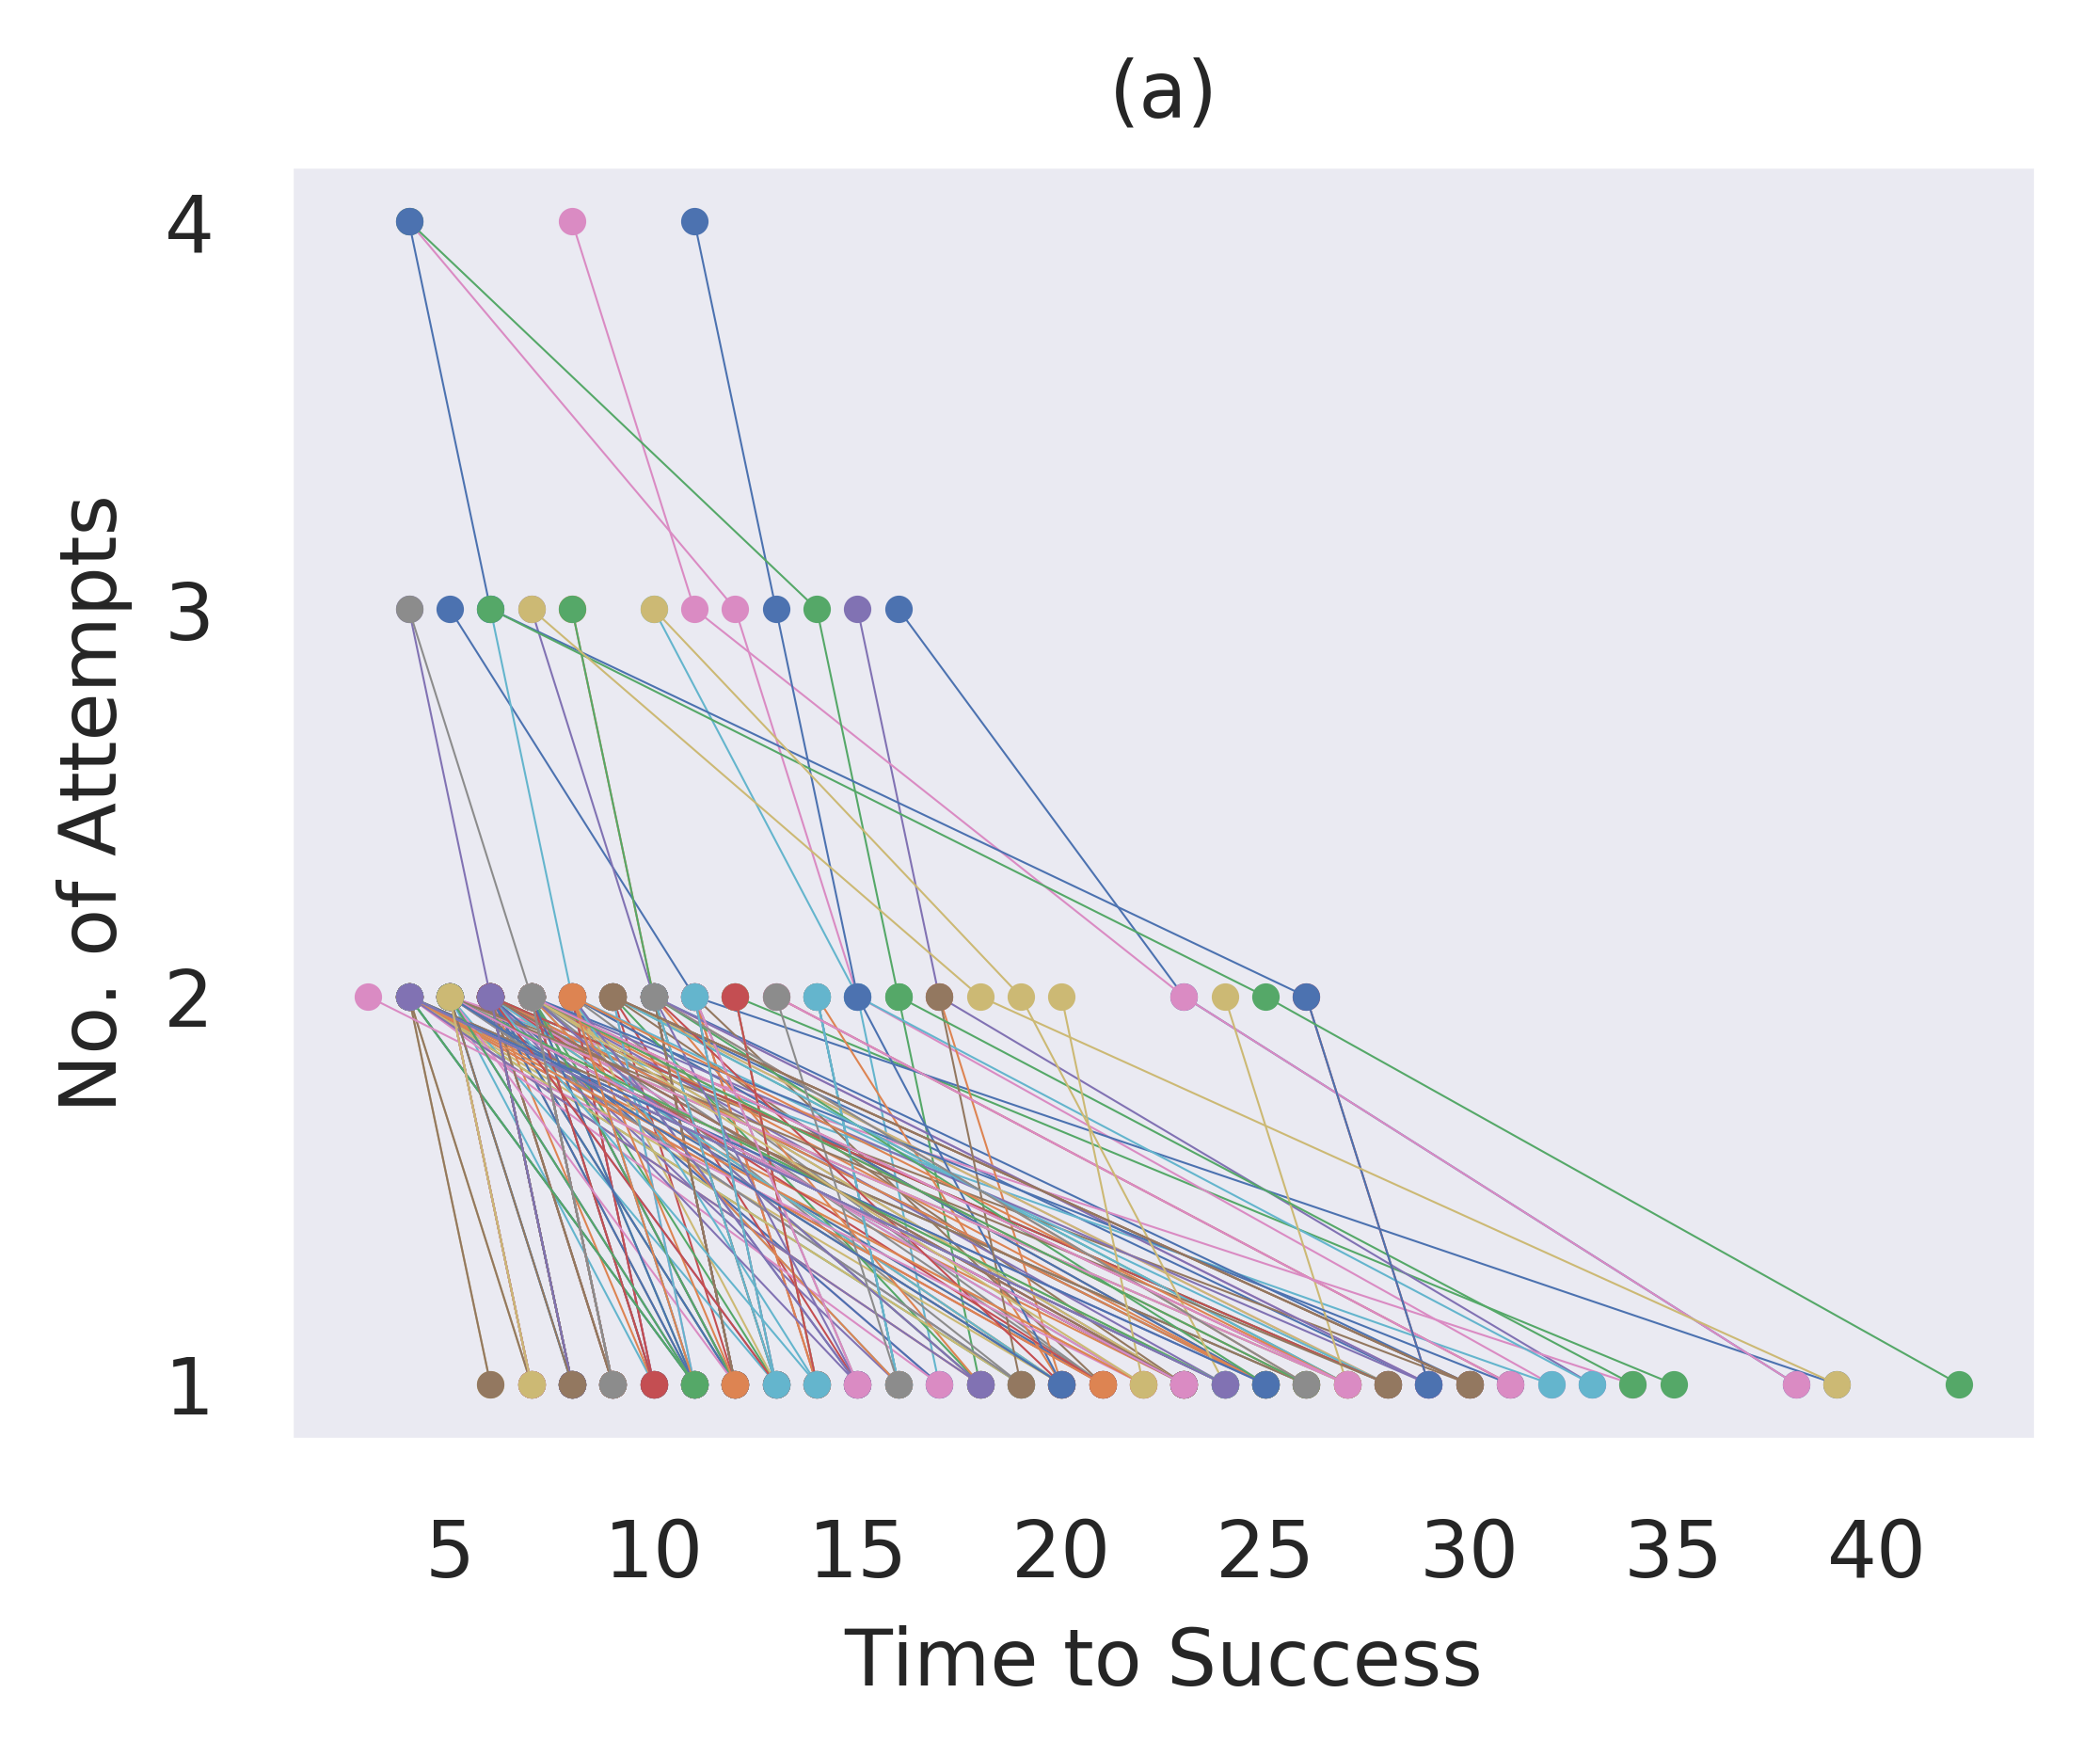

In [11]:
#Plot Persistence Graph

plt.figure(figsize = [4, 3], dpi = 600)

# cmap=plt.cm.rainbow(np.linspace(0,1,250))

plt.xlabel('Time to Success', fontsize=10)
plt.ylabel('No. of Attempts', fontsize=10)

plt.xticks(np.arange(0, 65, 5),fontsize=10, rotation=0)
plt.yticks(np.arange(1, 5, 1),fontsize=10, rotation=0)

plt.title("(a)", fontsize=10)

for i in range(len(ts_grabs_List)):
    x = np.arange(len(ts_grabs_List[i]))+1
    y = ts_grabs_List[i]
    
    #plt.plot(y,x, linewidth=0.25, marker="o", markersize=2.5, color=cmap[i])
    plt.plot(y,x, linewidth=0.25, marker="o", markersize=2.5)


plt.savefig('../variety_list/persistence', bbox_inches = 'tight',dpi=600)

plt.show()

## Script to Obtain xyz-coordinates of Goal and Box for Individual Episodes -from Successful Episodes List

In [12]:
#1 Define Custom Variety List
varietyList = [270, 7220, 7511, 8348, 8834]
print(varietyList)

[270, 7220, 7511, 8348, 8834]


In [13]:
#2 Script to populate boxXYZ list and goal XYZ list, and combine them
boxXYZ=[]
goalXYZ=[]

for file in varietyList:

    episodeMTX = successEpisodeList[file]
    
    step = episodeMTX[0]
    goalXYZ.append((np.double(step[11]),np.double(step[12]),np.double(step[13])))
    boxXYZ.append((np.double(step[8]),np.double(step[9]),np.double(step[10])))

goalXYZ=np.array(goalXYZ)
boxXYZ=np.array(boxXYZ)
customList = np.column_stack((boxXYZ,goalXYZ))
print(customList)

[[0.88738209 0.67135581 0.36473541 1.26480491 0.83517009 0.36469864]
 [0.92672255 0.83990024 0.36473541 1.24021174 0.88395275 0.36469864]
 [0.9299123  0.84181831 0.36473541 1.26509798 0.75185502 0.36469864]
 [0.89379268 0.70360554 0.36473541 1.23864598 0.81704043 0.36469864]
 [0.89382242 0.81766053 0.36473541 1.24409967 0.59984027 0.36469864]]


In [8]:
#3 Rename and Save Custom List

np.save('../outputs/boxXYZgoalXYZ_mulgrab4.npy',customList)

## Script to plot histogram of number of number of attempts 

In [15]:
print(len(successEpisodeList))

11280


[5804, 5226, 232, 13, 5, 0]
[0. 1. 2. 3. 4. 5.]


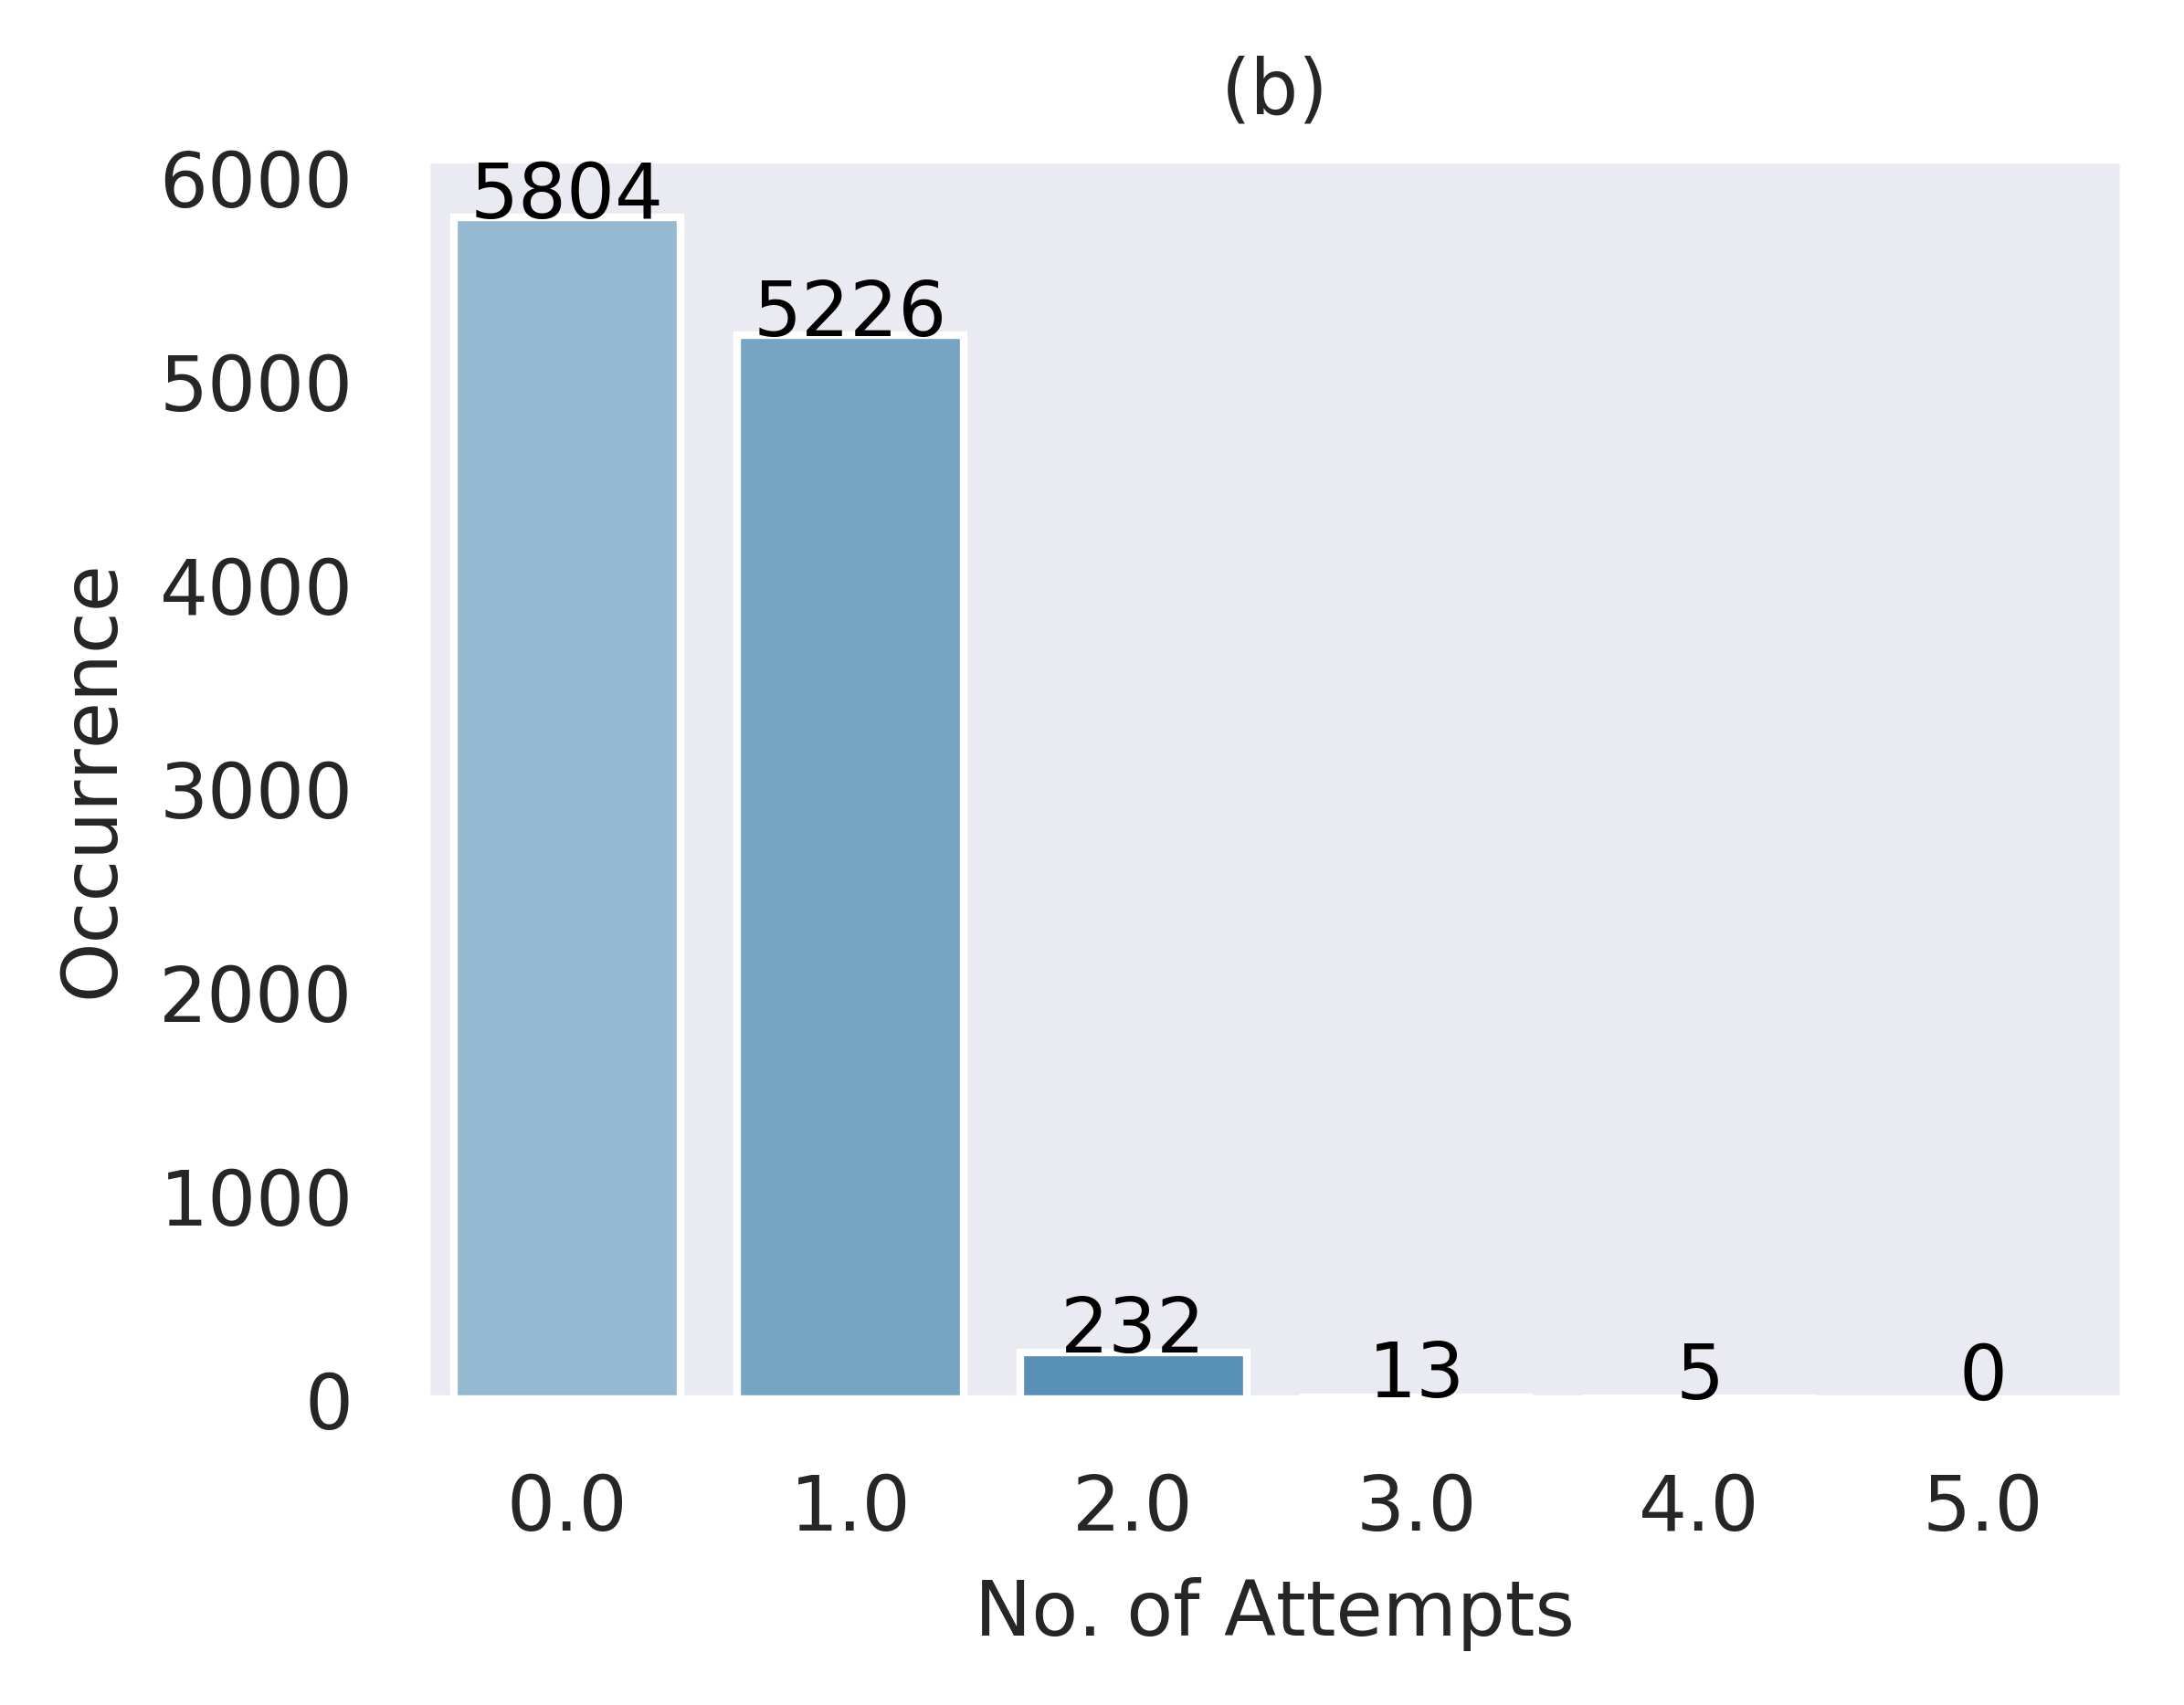

In [16]:
print(num_attempts)

plt.figure(figsize = [4, 3], dpi = 600)

# cmap=plt.cm.rainbow(np.linspace(0,1,250))

plt.xlabel('No. of Attempts', fontsize=10)
plt.ylabel('Occurrence', fontsize=10)

plt.title("(b)", fontsize=10)

plt.xticks(np.arange(0,6,1),fontsize=10, rotation=0)
plt.yticks(fontsize=10, rotation=0)

x = np.linspace(0,5,6)
# plt.bar(x,num_attempts, color='red')
print(x)

pal = sns.color_palette("Blues_d", len(num_attempts))

ax = sns.barplot(x=x, y=num_attempts, palette=np.array(pal[::-1]))

for i in range(len(num_attempts)):
    ax.text(x = 0+i, y = num_attempts[i], s = num_attempts[i], color='black', ha="center")
    
plt.savefig('../variety_list/attempts_bar', bbox_inches = 'tight',dpi=600)
plt.show()
